In [104]:
# 영화의 평점 예측해 보기
# 데이터를 필요에 따라 시각화 해보면서... 가능하면 의미있는 피처들을 추출
#  - 피처들을 선택..
#  - 1. 모든 피처를 학습
#  - 2. 피처의 중요도를 확인해서 중요한 피처만 선택
#  - 3. 상관관계를 보고 제거
#  - 4. 수식에 참여한(선영회귀)  가중치들을 오름차순으로 배열한후 단계적으로 제거하면서 재 학습
#  - 5. 상황에 따라서 기존 피처에는 없지만 groupby 기타 등등 이용해서 의미있는 피처를 생산

# 다양한 머신러닝 알고리즘을 적용해서 성능 좋은 알고리즘을 채택
#  - 교차분석, 파라메터튜이(하이퍼파라메터)

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [106]:
r_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/r.dat',
                   sep='::',header=None)

m_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/m.dat',
                   sep='::',header=None,encoding='ISO-8859-1')

u_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/u.dat',
                   sep='::',header=None,encoding='ISO-8859-1')

In [107]:
r_df.columns = ['user_id','movie_id','rating','time']
m_df.columns = ['movie_id','title','genre']
u_df.columns = ['user_id','gender','age','occupation','zipcode']

In [108]:
r_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [109]:
m_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [110]:
u_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [111]:
r_df.isna().sum(),m_df.isna().sum(),u_df.isna().sum()

(user_id     0
 movie_id    0
 rating      0
 time        0
 dtype: int64,
 movie_id    0
 title       0
 genre       0
 dtype: int64,
 user_id       0
 gender        0
 age           0
 occupation    0
 zipcode       0
 dtype: int64)

In [112]:
# 평점이 매겨진 영화의 개수, 평점에 참여한 유저의 수, 평점의 히스토그램(구간)

In [113]:
# 평점이 매겨진 영화의 개수
len(r_df['movie_id'].unique())

3706

In [114]:
# 평점에 참여한 유저수
len(r_df['user_id'].unique())

6040

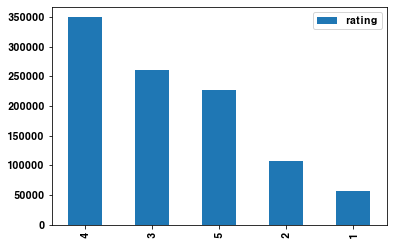

In [115]:
# 평점의 히스토그램(구간)
pd.DataFrame( r_df['rating'].value_counts() ).plot.bar()
plt.show()

In [116]:
r_df['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [117]:
len(r_df['rating'])

1000209

In [118]:
# 장르별 영화평점
# 소수가 높게평가한거랑. 다수가 낮게 평가한거랑.. 차이가 있을수 있으니 

# r_df and m_df를 movie_id 공통컬럼.. 이 컬럼을 기준으로 두 테이블의 합친후
# 장르별로 groupby를 해서 rating의 합과 유저의 수를 구한다.

In [119]:
rm_merge_df =  pd.merge(r_df,m_df, how='inner',on='movie_id')
rm_merge_df.head()

,user_id,movie_id,rating,time,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [120]:
mr_merged_df =  rm_merge_df.groupby('genre').agg({
    'rating':'sum',
    'user_id':'count'
})
print(type(mr_merged_df))
mr_merged_df.head()

<class 'pandas.core.frame.DataFrame'>


,rating,user_id
genre,,
Action,41302,12311
Action|Adventure,38408,10446
Action|Adventure|Animation,1431,345
Action|Adventure|Animation|Children's|Fantasy,365,135
Action|Adventure|Animation|Horror|Sci-Fi,2192,618


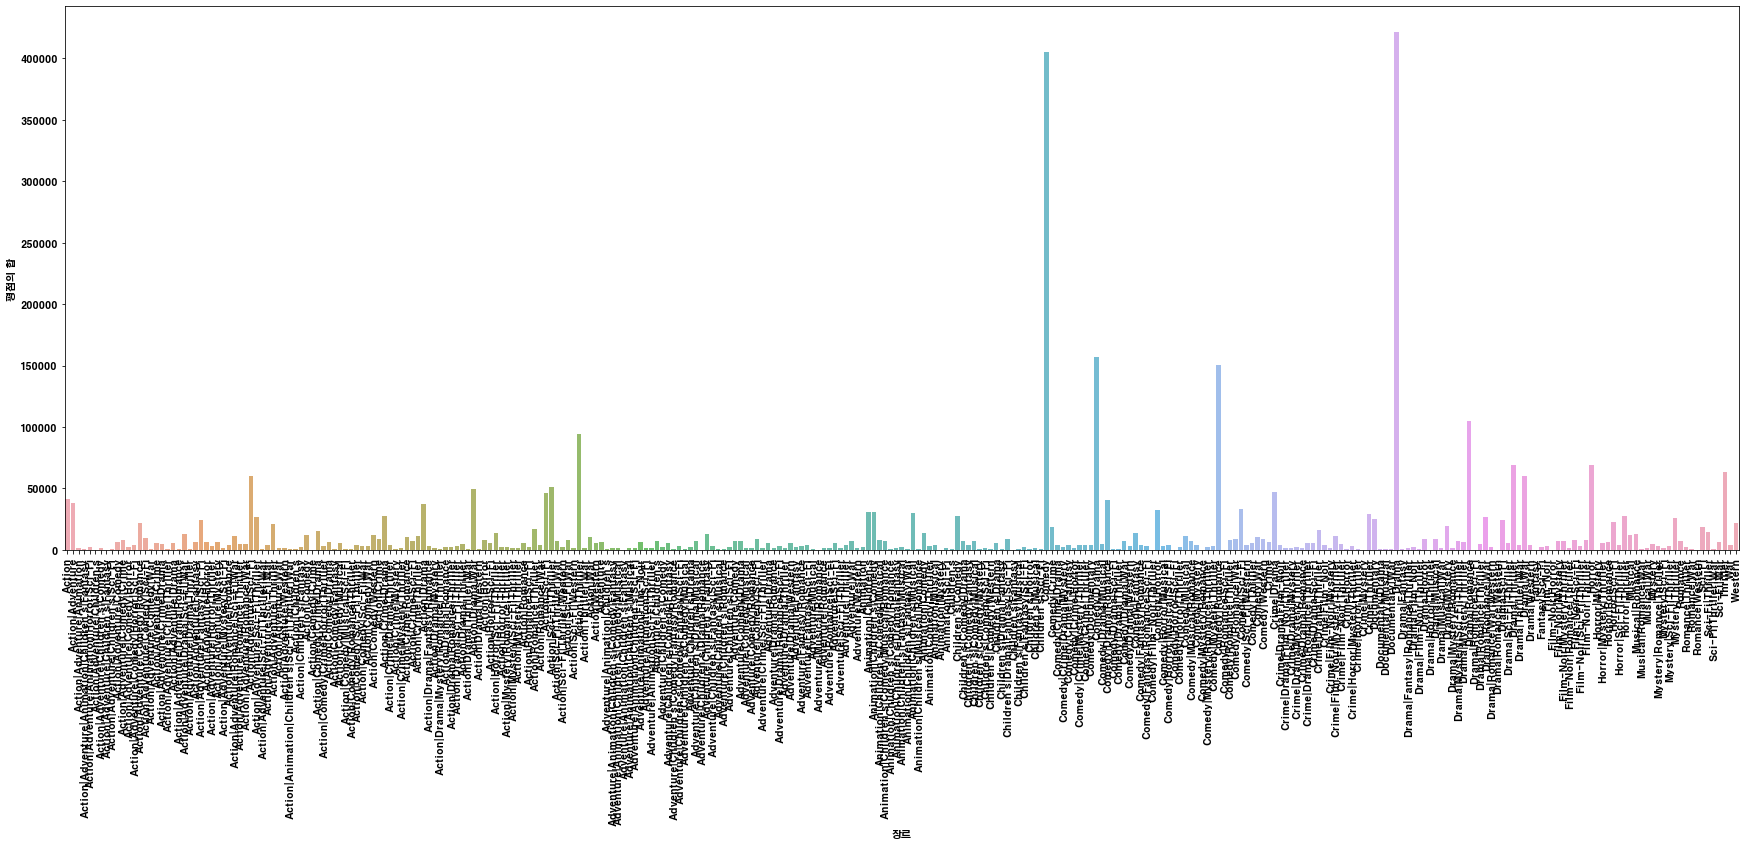

In [121]:
import seaborn as sns
plt.figure(figsize=(30,10))
ax = sns.barplot(mr_merged_df['rating'].index,mr_merged_df['rating'].values,alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("장르")
plt.ylabel("평점의 합")
plt.show()

In [122]:
mr_merged_df.sort_values(by='rating', ascending=False).head(100)

,rating,user_id
genre,,
Drama,421247,111423
Comedy,404936,116883
Comedy|Drama,157175,42245
Comedy|Romance,150812,42712
Drama|Romance,105170,29170
...,...,...
Action|Adventure|Horror,6527,1932
Action|Adventure|Mystery,6527,1906
Action|Adventure|Comedy,6429,2077


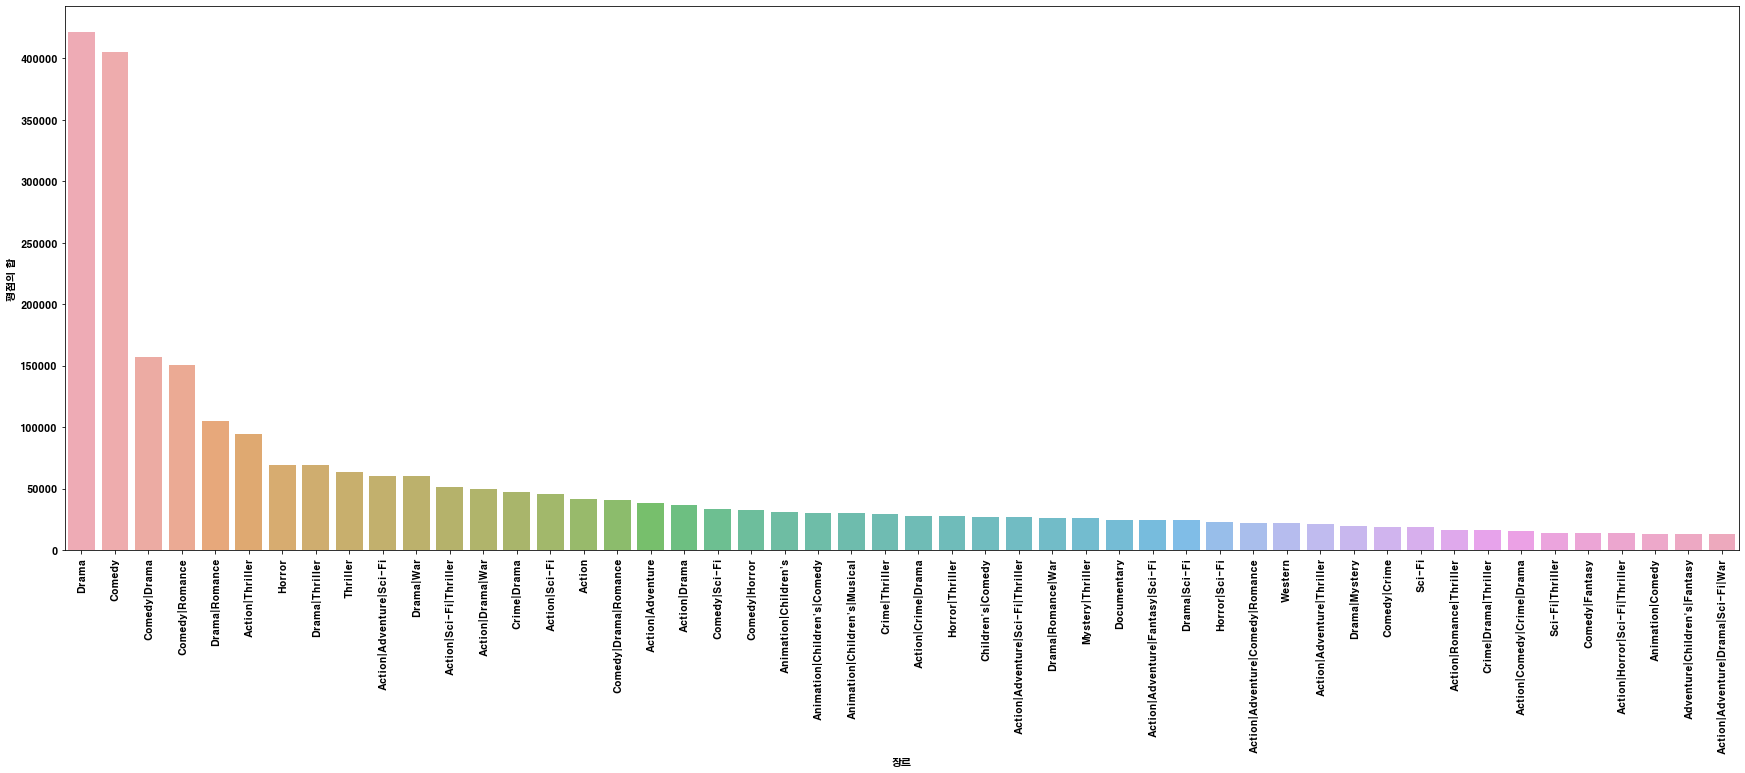

In [123]:
#현재 OS에 설치되어 있는 폰트
import matplotlib as mpl
sorted(set([i.name for i in mpl.font_manager.fontManager.ttflist]))
mpl.rc('font',family='HYGothic-Extra')

ratingtop50 = mr_merged_df.sort_values(by='rating', ascending=False).head(50)
import seaborn as sns
plt.figure(figsize=(30,10))
ax = sns.barplot(ratingtop50['rating'].index,ratingtop50['rating'].values,alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("장르")
plt.ylabel("평점의 합")
plt.show()

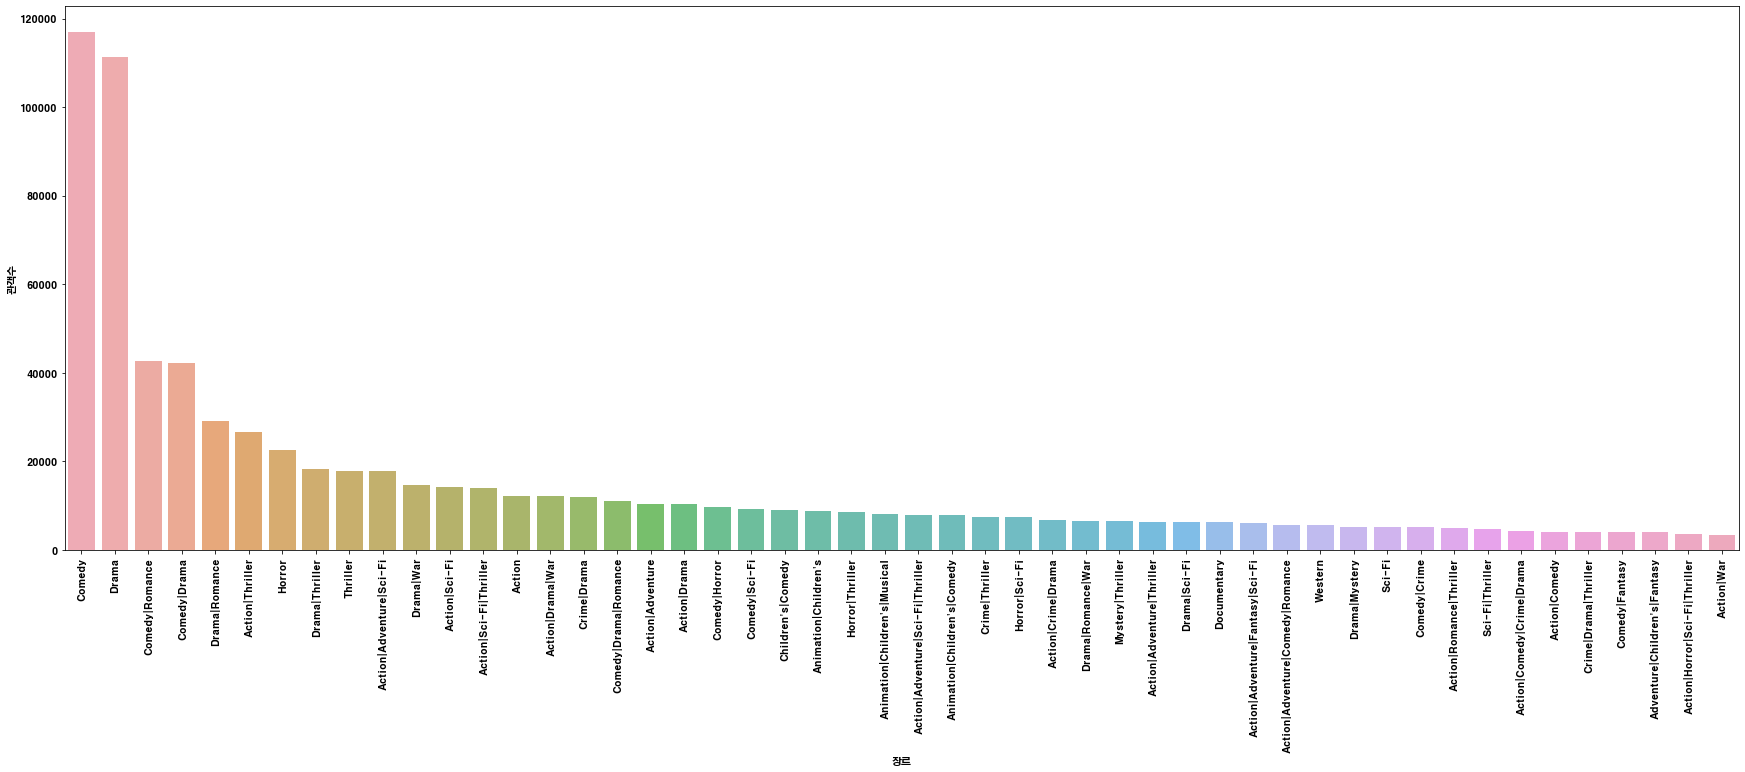

In [124]:
ratingtop50 = mr_merged_df.sort_values(by='user_id', ascending=False).head(50)
import seaborn as sns
plt.figure(figsize=(30,10))
ax = sns.barplot(ratingtop50['user_id'].index,ratingtop50['user_id'].values,alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("장르")
plt.ylabel("관객수")
plt.show()

M    4331
F    1709
Name: gender, dtype: int64


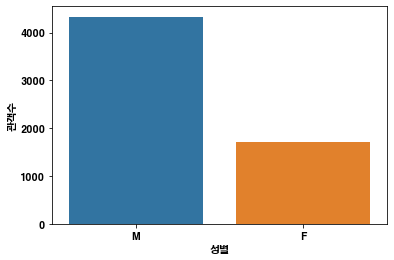

In [125]:
# 사용자의 성별분포
print(u_df['gender'].value_counts())
sns.barplot(u_df['gender'].value_counts().index, u_df['gender'].value_counts().values)
plt.xlabel("성별")
plt.ylabel("관객수")
plt.show()

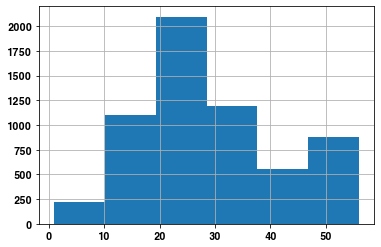

In [126]:
# 사용자의 나이분포  10~40
u_df['age'].hist(bins=6)
plt.show()

In [127]:
#영화의 평균평점
temp = rm_merge_df.groupby('genre')['rating'].agg(['count','mean'])
temp.sort_values(by='count', ascending=False).head(10)

,count,mean
genre,,
Comedy,116883,3.464456
Drama,111423,3.780611
Comedy|Romance,42712,3.530905
Comedy|Drama,42245,3.720559
Drama|Romance,29170,3.605417
Action|Thriller,26759,3.525917
Horror,22563,3.071932
Drama|Thriller,18248,3.782552
Thriller,17851,3.555879


In [128]:
# 예측하기
# 유저별 평가한 영화의 개수
# 유저별 평가한 평균 영하 점수
# 유저별 평가한 영화 점수 편차
u_gropu_info =  r_df.groupby('user_id')['rating'].agg(['count','mean','std'])
u_gropu_info.columns = ['rating_count','rating_mean','rating_std']
u_gropu_info.head()


,rating_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


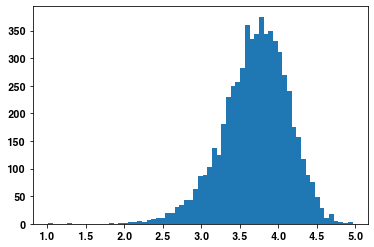

In [129]:
u_gropu_info['rating_mean'].hist(bins='auto',grid=False)
plt.show()

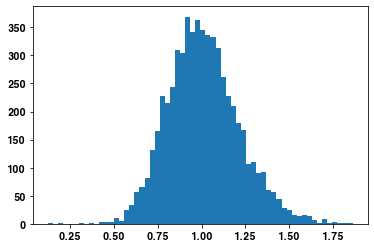

In [130]:
u_gropu_info['rating_std'].hist(bins='auto',grid=False)
plt.show()

In [131]:
r_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [132]:
# 가로는 movie id  세로는 user_id  rating으로 하는 pivot 테이블

In [133]:
r_df_pivot =  r_df.pivot(index = 'user_id', columns='movie_id',values='rating')
r_df_pivot.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# surprise 라이브러리..... 추천시스템 구현 사용하는 라이브러리
# 사이킷런과 사용 방법유사
#  !pip install surprise 이게 안되면 밑에 방법    콘솔에서 실행할때는 !는 제외한다.
#  !conda install -c conda-forge scikit-surprise   --> 콘솔창에서 실행

In [135]:
# SVD 특이값 분해 : 행렬분해 중에 가장 많이 사용 되는 방법
# SVD를 사용하려면 surprise 라이브러를 이용한다.


In [136]:
r_df['rating'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [137]:
from surprise import SVD, Reader, accuracy, Dataset
from surprise.model_selection import train_test_split

In [138]:
# DataFrame 섞기
temp_df = r_df[['user_id','movie_id','rating']].sample(frac=1)
temp_df = temp_df[:10000]
len(temp_df)

10000

In [139]:
# SVD를 이용해서 데이터셋을 생성
# 평점의 범위가 1 ~ 5인 Reader 객체를 생성
reader =  Reader(rating_scale=(1,5))
# surprise형태의 데이터 구조로 변환시키는 함수 Dataset
data =  Dataset.load_from_df(temp_df, reader)
train_data =  data.build_full_trainset()

In [140]:
# SVD 모델을 학습
model = SVD(
    n_factors=8,
    lr_all=0.005,
    reg_all=0.02,
    n_epochs=10
)
model.fit(train_data)

In [141]:
train_data

In [142]:
'''
# build_anti_testsset():
학습에 사용된 matrix구조의 데이터에서 0으로 평가되어 있는 부분의 데이터(raring 0).
user , item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출

유저기반으로 나와 비슷한 다른 유저의 성향을 분석해서 나도 그럴거라는 예측을 할수 있는 메소드
유저가 평가하지 않은 영화에 대한 평점을 예측
'''
# 학습에 사용된 유저나 아이템--> 점수가 매개져있지 않은 데이터
test_data = train_data.build_anti_testset()
predict =  model.test(test_data)

In [143]:
test_data

[(4185, 924, 3.5605),
 (4185, 2985, 3.5605),
 (4185, 2722, 3.5605),
 (4185, 3713, 3.5605),
 (4185, 431, 3.5605),
 (4185, 3129, 3.5605),
 (4185, 2144, 3.5605),
 (4185, 1617, 3.5605),
 (4185, 2710, 3.5605),
 (4185, 3745, 3.5605),
 (4185, 2395, 3.5605),
 (4185, 1073, 3.5605),
 (4185, 3952, 3.5605),
 (4185, 1291, 3.5605),
 (4185, 17, 3.5605),
 (4185, 110, 3.5605),
 (4185, 1394, 3.5605),
 (4185, 555, 3.5605),
 (4185, 2392, 3.5605),
 (4185, 337, 3.5605),
 (4185, 2266, 3.5605),
 (4185, 70, 3.5605),
 (4185, 2141, 3.5605),
 (4185, 3175, 3.5605),
 (4185, 12, 3.5605),
 (4185, 1267, 3.5605),
 (4185, 2706, 3.5605),
 (4185, 1051, 3.5605),
 (4185, 1249, 3.5605),
 (4185, 1968, 3.5605),
 (4185, 3639, 3.5605),
 (4185, 260, 3.5605),
 (4185, 356, 3.5605),
 (4185, 3509, 3.5605),
 (4185, 2615, 3.5605),
 (4185, 3426, 3.5605),
 (4185, 150, 3.5605),
 (4185, 368, 3.5605),
 (4185, 1275, 3.5605),
 (4185, 3806, 3.5605),
 (4185, 3053, 3.5605),
 (4185, 2922, 3.5605),
 (4185, 357, 3.5605),
 (4185, 2076, 3.5605),
 (41

In [144]:
len(predict)

8544326

In [145]:
#r_ui : 원래 값  est : 예측한 값  iid : item의 아이디
# 빈공간의 점수를 예측한값
for _,iid,_,predict_rate,_ in predict[:10]:
    print(f"item id : {iid}, predict_rate:{predict_rate}")

item id : 924, predict_rate:3.9185240067613303
item id : 2985, predict_rate:3.524285757576593
item id : 2722, predict_rate:3.5443693325902252
item id : 3713, predict_rate:3.5552795855107746
item id : 431, predict_rate:3.607357448679557
item id : 3129, predict_rate:3.664120101488899
item id : 2144, predict_rate:3.633421637134624
item id : 1617, predict_rate:4.013845656311423
item id : 2710, predict_rate:3.5705022954357246
item id : 3745, predict_rate:3.656357262305073


In [146]:
'''
build_test_set()
학습에 사용된 matrix구조의 데이터에서 0으로 평가되어 있는 부분의 데이터(raring 0).
user , item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출

유저기반으로 나와 비슷한 다른 유저의 성향을 분석해서 나도 그럴거라는 예측을 할수 있는 메소드
유저가 평가한 값을 예측하는 데이터를 반환하는 함수
'''

test_data =  train_data.build_testset()
predict = model.test(test_data)
# 원래부터 비어있지 않은 행열달의 값들을 출력 
print(predict[:1])
for _,iid,r_ui,predict_rate,_ in predict[:10]:
    print(f"item id : {iid}, real rating:{r_ui},  predict_rate:{predict_rate}")


[Prediction(uid=4185, iid=2867, r_ui=4.0, est=3.6164077390651683, details={'was_impossible': False})]
item id : 2867, real rating:4.0,  predict_rate:3.6164077390651683
item id : 924, real rating:4.0,  predict_rate:3.9705256494999293
item id : 2985, real rating:5.0,  predict_rate:3.6008601404900418
item id : 2722, real rating:3.0,  predict_rate:3.40024495300689
item id : 160, real rating:2.0,  predict_rate:3.3053094403925063
item id : 2628, real rating:2.0,  predict_rate:3.4062752470586295
item id : 551, real rating:4.0,  predict_rate:3.7741084301393104
item id : 1429, real rating:5.0,  predict_rate:3.571947066415812
item id : 88, real rating:4.0,  predict_rate:3.592338453931133
item id : 3713, real rating:3.0,  predict_rate:3.5489412724359375


In [147]:
import time
# 영화 점수를 예측
# SVD를 이용해서 데이터셋을 생성
# 평점의 범위가 1 ~ 5인 Reader 객체를 생성
reader =  Reader(rating_scale=(1,5))
temp_df = r_df[['user_id','movie_id','rating']].sample(frac=1)[:100000]
data = Dataset.load_from_df( pd.DataFrame(temp_df),reader )
train_data =  data.build_full_trainset()

# SVD 모델 학습
start = time.time()
model = SVD(
    n_factors=8,
    lr_all=0.005,
    reg_all=0.02,
    n_epochs=100
)
model.fit(train_data)
end = time.time()
print(f"학습에 걸린 시간 {end-start}")

학습에 걸린 시간 8.70043396949768


In [148]:
# 평가대상의 유저를 선택
target_user_id = 2
target_user_data =  r_df[r_df['user_id'] == 2]
target_user_data

,user_id,movie_id,rating,time
53,2,1357,5,978298709
54,2,3068,4,978299000
55,2,1537,4,978299620
56,2,647,3,978299351
57,2,2194,4,978299297
...,...,...,...,...
177,2,356,5,978299686
178,2,1245,2,978299200
179,2,1246,5,978299418
180,2,3893,1,978299535


In [149]:
# target_user_id = 2 유저가 평가한 영화의 평점  dic   movie_id : rating
# 2인 유저가 본 영화에 대한 평점
target_user_dic = {}
for i in target_user_data.values:
    target_user_dic[i[1]] = i[2]
    
print(target_user_dic)

{1357: 5, 3068: 4, 1537: 4, 647: 3, 2194: 4, 648: 4, 2268: 5, 2628: 3, 1103: 3, 2916: 3, 3468: 5, 1210: 4, 1792: 3, 1687: 3, 1213: 2, 3578: 5, 2881: 3, 3030: 4, 1217: 3, 3105: 4, 434: 2, 2126: 3, 3107: 2, 3108: 3, 3035: 4, 1253: 3, 1610: 5, 292: 3, 2236: 5, 3071: 4, 902: 2, 368: 4, 1259: 5, 3147: 5, 1544: 4, 1293: 5, 1188: 4, 3255: 4, 3256: 2, 3257: 3, 110: 5, 2278: 3, 2490: 3, 1834: 4, 3471: 5, 589: 4, 1690: 3, 3654: 3, 2852: 3, 1945: 5, 982: 4, 1873: 4, 2858: 4, 1225: 5, 2028: 4, 515: 5, 442: 3, 2312: 3, 265: 4, 1408: 3, 1084: 3, 3699: 2, 480: 5, 1442: 4, 2067: 5, 1265: 3, 1370: 5, 1193: 5, 1801: 3, 1372: 3, 2353: 4, 3334: 4, 2427: 2, 590: 5, 1196: 5, 1552: 3, 736: 4, 1198: 4, 593: 5, 2359: 3, 95: 2, 2717: 3, 2571: 4, 1917: 3, 2396: 4, 3735: 3, 1953: 4, 1597: 3, 3809: 3, 1954: 5, 1955: 4, 235: 3, 1124: 5, 1957: 5, 163: 4, 21: 1, 165: 3, 2321: 3, 1090: 2, 380: 5, 2501: 5, 349: 4, 457: 4, 1096: 4, 920: 5, 459: 3, 1527: 4, 3418: 4, 1385: 3, 3451: 4, 3095: 4, 780: 3, 498: 3, 2728: 3, 200

In [150]:
# 유저 2번이 안본 영화에대한 데이터
'''
movie_id  user_id
100        2
100        3        
100        2
200      
300
r_df[r_df['user_id'] != 2] 수행하면
결과는 : 100,200,300  헐... 100은 2가 본 영화
non_target_data =  r_df[r_df['user_id'] != 2]
r_df.head()
위와같이 하면 안되고.

id가 2번이 유저가 본영화 리스트를 r_df에서 추출한다음
그 영화리스를 m_df 와 비교해서 없는 영화리스트를 추출 하면 된다.
'''

# for 문을 이용해서
non_target_user_data = []
list(target_user_dic.keys())
for i in m_df.values:
    if i[0] not in target_user_dic.keys():
        non_target_user_data.append(i[0])

# 검증
print(target_user_dic.keys() in non_target_user_data)        

    


False


In [151]:
target_user_data['movie_id'].values

array([1357, 3068, 1537,  647, 2194,  648, 2268, 2628, 1103, 2916, 3468,
       1210, 1792, 1687, 1213, 3578, 2881, 3030, 1217, 3105,  434, 2126,
       3107, 3108, 3035, 1253, 1610,  292, 2236, 3071,  902,  368, 1259,
       3147, 1544, 1293, 1188, 3255, 3256, 3257,  110, 2278, 2490, 1834,
       3471,  589, 1690, 3654, 2852, 1945,  982, 1873, 2858, 1225, 2028,
        515,  442, 2312,  265, 1408, 1084, 3699,  480, 1442, 2067, 1265,
       1370, 1193, 1801, 1372, 2353, 3334, 2427,  590, 1196, 1552,  736,
       1198,  593, 2359,   95, 2717, 2571, 1917, 2396, 3735, 1953, 1597,
       3809, 1954, 1955,  235, 1124, 1957,  163,   21,  165, 2321, 1090,
        380, 2501,  349,  457, 1096,  920,  459, 1527, 3418, 1385, 3451,
       3095,  780,  498, 2728, 2002, 1962, 1784, 2943, 2006,  318, 1207,
       1968, 3678, 1244,  356, 1245, 1246, 3893, 1247], dtype=int64)

In [152]:
# 넘파이의 차집합을 이용해서 m_df - target_user_data['movie_id'].values
import numpy as np
non_target_user_movie_id =  np.setdiff1d(m_df['movie_id'], target_user_data['movie_id'].values)

In [161]:
test_data = []
for index, row in r_df.iterrows():
    if row['movie_id'] in non_target_user_movie_id:
        test_data.append((target_user_id,row['movie_id'],row['rating']))

In [154]:
# test_data2=[(target_user_id,i['movie_id'],0 ) for i in r_df.values if i['movie_id'] in non_target_user_movie_id]
# test_data2

In [162]:
test_data[:5]

[(2, 661, 3), (2, 914, 3), (2, 3408, 4), (2, 2355, 5), (2, 1197, 3)]

In [163]:
# 타겟이 된 2번 유저의 점수를 예측
target_user_predict =  model.test(test_data)

In [160]:
# test_data = []
# for index, row in m_df.iterrows():
#     movie_id = row['movie_id']
#     rating = 0
#     if movie_id in non_target_user_movie_id:
#         continue
#     test_data.append((target_user_id, movie_id, rating))
# test_data    

In [164]:
# 예측한 점수중에서 영화별 점수를 dictionary 형태로 저장
predic_dic = {}
for _,movie_id,rating,predict_rating,_ in target_user_predict:
    predic_dic[movie_id] = predict_rating    
predic_dic

{661: 3.9068210319444034,
 914: 4.387789570365937,
 3408: 3.86948978600318,
 2355: 4.1074165533341365,
 1197: 3.888997814169543,
 1287: 4.526386385328867,
 2804: 4.113454271267151,
 594: 4.0507300780406315,
 919: 4.5580323586347875,
 595: 3.5413622359361767,
 938: 3.6995729238376316,
 2398: 4.326576038014987,
 2918: 4.742150697456193,
 1035: 3.583025740836421,
 2791: 3.69830668591379,
 2687: 3.7868824199541975,
 2018: 3.4073111776067537,
 2797: 3.3792928347974,
 720: 4.656399116369998,
 1270: 4.198098325900674,
 527: 4.307276538988324,
 2340: 3.388008622788184,
 48: 3.4677553668449175,
 1097: 4.659566204517187,
 1721: 3.249678375369783,
 1545: 4.075849403537114,
 745: 4.18404006829846,
 2294: 3.570946742145332,
 3186: 3.9735658672729666,
 1566: 3.7816946263508013,
 588: 3.4974556793095966,
 1907: 3.6156016430345037,
 783: 3.4143997253538667,
 1836: 3.9458370493845885,
 1022: 4.187533685582375,
 2762: 4.600512655115136,
 150: 4.219275410053917,
 1: 4.637378736221804,
 1961: 4.2822581202

In [169]:
# 예측점수가 높은 top10
sorted_predic =  sorted(predic_dic.items(), key=lambda x: x[1], reverse=True)
sorted_predic[:10]

[(260, 5),
 (2959, 5),
 (858, 5),
 (1172, 5),
 (1204, 4.946743230434346),
 (922, 4.932467384310537),
 (924, 4.930100517734524),
 (913, 4.920494308766573),
 (1258, 4.898653340728652),
 (1148, 4.894430053602981)]

In [172]:
# 영화 제목 붙이기
movie_dic = {}
for index, row in m_df.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dic[movie_id] = movie_title
movie_dic

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (1995)',
 33: 'Wings of Courage (1995)',
 34: 'Babe (1

In [ ]:
# top10 정보하고 붙여보기